In [1]:
import sys
import sklearn
import tensorflow as tf
from packaging import version
import numpy as np

assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train,y_train = X_train_full[:-6000], y_train_full[:-6000]
X_valid, y_valid = X_train_full[-6000:], y_train_full[-6000:]

In [5]:
X_train.shape

(54000, 28, 28)

In [6]:
X_train.dtype

dtype('uint8')

In [7]:
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

In [8]:
y_train

array([9, 0, 0, ..., 5, 3, 9], dtype=uint8)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

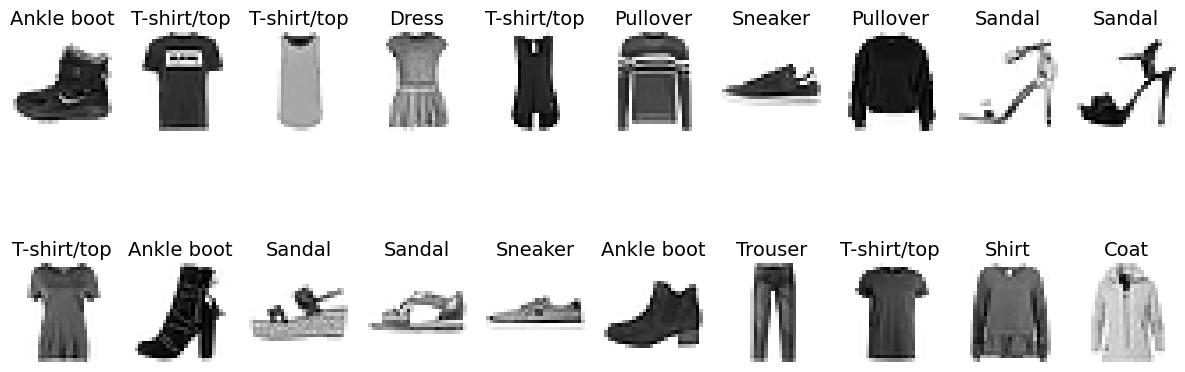

In [10]:
plt.figure(figsize=(15, 5))
for row in range(2):
    for col in range(10):
        index = 10 * row + col
        plt.subplot(2, 10, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [11]:
class_names_subset = [class_names[i] for i in y_train[0:4]]
print(class_names_subset)

['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress']


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer

### Creating the model using the Sequential API

In [13]:
model = Sequential()
model.add(InputLayer(input_shape=[28, 28]))
model.add(Flatten())
model.add(Dense(310, activation="relu"))
model.add(Dense(90, activation="relu"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 310)                 │         243,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 90)                  │          27,990 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,250 (1.04 MB)

 Trainable params: 272,250 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [15]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

### Training the model

In [16]:
hist = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.0357 - sparse_categorical_accuracy: 0.6600 - val_loss: 0.5287 - val_sparse_categorical_accuracy: 0.8165
Epoch 2/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.5077 - sparse_categorical_accuracy: 0.8257 - val_loss: 0.4887 - val_sparse_categorical_accuracy: 0.8178
Epoch 3/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.4549 - sparse_categorical_accuracy: 0.8410 - val_loss: 0.4355 - val_sparse_categorical_accuracy: 0.8447
Epoch 4/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4213 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.4533 - val_sparse_categorical_accuracy: 0.8422
Epoch 5/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3991 - sparse_categorical_accuracy: 0.8596 - val_loss: 0.4179 - val_sparse_categorical_accuracy: 0.8542
Epoch 6/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3858 - sparse_categorical_accuracy: 0.8658 - val_loss: 0.3975 - val_sparse_categorical_accura

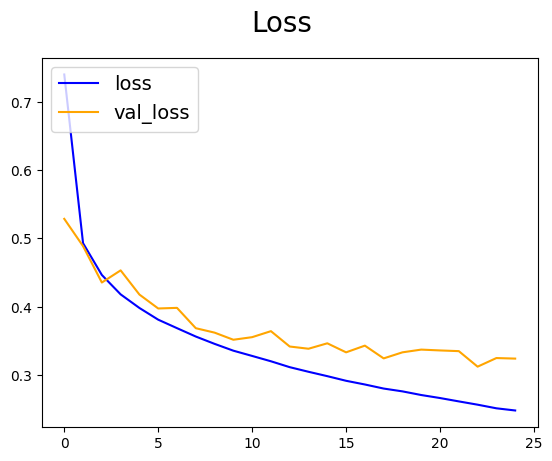

In [17]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

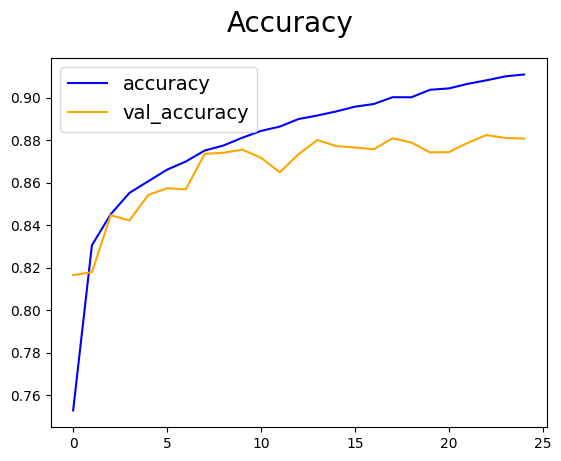

In [18]:
fig = plt.figure()
plt.plot(hist.history['sparse_categorical_accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [19]:
hist.history

{'loss': [0.7400376796722412,
  0.49308866262435913,
  0.44655853509902954,
  0.41816627979278564,
  0.3982498049736023,
  0.38110727071762085,
  0.3686956763267517,
  0.35643190145492554,
  0.34571024775505066,
  0.33571773767471313,
  0.3280254900455475,
  0.32021620869636536,
  0.3115856945514679,
  0.30484065413475037,
  0.2984319031238556,
  0.2916546165943146,
  0.28624212741851807,
  0.2802835702896118,
  0.27615636587142944,
  0.2708088457584381,
  0.26639920473098755,
  0.2614765465259552,
  0.25667402148246765,
  0.2513727843761444,
  0.2481909692287445],
 'sparse_categorical_accuracy': [0.7528148293495178,
  0.8305370211601257,
  0.8450925946235657,
  0.8551666736602783,
  0.8606111407279968,
  0.8660555481910706,
  0.8699073791503906,
  0.8750555515289307,
  0.8774259090423584,
  0.881074070930481,
  0.8842962980270386,
  0.8863333463668823,
  0.8898888826370239,
  0.8915370106697083,
  0.8934444189071655,
  0.8956851959228516,
  0.8969444632530212,
  0.9001296162605286,
  

### Model Evaluation

In [20]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3420 - sparse_categorical_accuracy: 0.8794


[0.34097152948379517, 0.8769000172615051]

### Using model to make prediction

In [21]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.01, 0.  , 0.  , 0.  , 0.92, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [22]:
y_proba.argmax(axis=-1)

array([9, 2, 1, 1, 6])

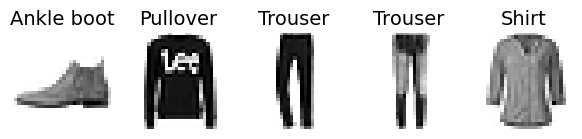

In [23]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()